# Installing Essential Libararies

In [4]:
!git clone https://github.com/pytorch/fairseq.git
!cd fairseq && git checkout 9a1c497
!pip install --upgrade ./fairseq/

Cloning into 'fairseq'...
remote: Enumerating objects: 31452, done.
remote: Counting objects: 100% (105/105), done.
remote: Compressing objects: 100% (53/53), done.
remote: Total 31452 (delta 60), reused 78 (delta 52), pack-reused 31347
Receiving objects: 100% (31452/31452), 21.69 MiB | 17.24 MiB/s, done.
Resolving deltas: 100% (23132/23132), done.
Note: checking out '9a1c497'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 9a1c4970 Make Hydra logging work with DDP (#1568)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./fairseq
  DEPRECATION: A future pip ve

# Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Training

In [5]:
!pip install sacremoses

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 8.0 MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895260 sha256=a065388b678044903b43b248d88a8f7b3934bdc42ae44bc7e1363bc3acb47da5
  Stored in directory: /root/.cache/pip/wheels/87/39/dd/a83eeef36d0bf98e7a4d1933a4ad2d660295a40613079bafc9
Successfully built sacremoses


In [6]:
!pip install sacrebleu==1.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 54 kB 2.3 MB/s 
  Attempting uninstall: portalocker
    Found existing installation: portalocker 2.4.0
    Uninstalling portalocker-2.4.0:
      Successfully uninstalled portalocker-2.4.0
  Attempting uninstall: sacrebleu
    Found existing installation: sacrebleu 2.1.0
    Uninstalling sacrebleu-2.1.0:
      Successfully uninstalled sacrebleu-2.1.0


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
!fairseq-train drive/MyDrive/CA5/data/summary \
    --source-lang en --target-lang fa --arch transformer \
    --criterion label_smoothed_cross_entropy --label-smoothing 0.1 --weight-decay 0.0 --optimizer adam --adam-betas '(0.9, 0.98)' \
    --lr 0.0007 --lr-scheduler inverse_sqrt --warmup-init-lr 1e-07 --warmup-updates 1300 \
    --batch-size 64 --batch-size-valid 64 --clip-norm 0.0  --encoder-embed-dim 512 --decoder-embed-dim 512 --update-freq 8 --save-interval 25 \
    --dropout 0.1 --attention-dropout 0.1 --encoder-layers 6 --decoder-layers 6 --encoder-ffn-embed-dim 2048 --decoder-ffn-embed-dim 2048 \
    --log-interval 1000 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5}' \
    --eval-bleu-detok moses \
    --eval-bleu-remove-bpe \
    --eval-bleu-print-samples \
    --scoring sacrebleu \
    --best-checkpoint-metric bleu --maximize-best-checkpoint-metric \
    --max-epoch 400 \
    --save-dir drive/MyDrive/CA5/checkpoints/fairseq \


2022-06-06 04:47:51 | INFO | fairseq_cli.train | {'_name': None, 'common': {'_name': None, 'no_progress_bar': False, 'log_interval': 1000, 'log_format': None, 'tensorboard_logdir': None, 'wandb_project': None, 'azureml_logging': False, 'seed': 1, 'cpu': False, 'tpu': False, 'bf16': False, 'memory_efficient_bf16': False, 'fp16': False, 'memory_efficient_fp16': False, 'fp16_no_flatten_grads': False, 'fp16_init_scale': 128, 'fp16_scale_window': None, 'fp16_scale_tolerance': 0.0, 'min_loss_scale': 0.0001, 'threshold_loss_scale': None, 'user_dir': None, 'empty_cache_freq': 0, 'all_gather_list_size': 16384, 'model_parallel_size': 1, 'quantization_config_path': None, 'profile': False, 'reset_logging': False, 'suppress_crashes': False}, 'common_eval': {'_name': None, 'path': None, 'post_process': None, 'quiet': False, 'model_overrides': '{}', 'results_path': None}, 'distributed_training': {'_name': None, 'distributed_world_size': 1, 'distributed_rank': 0, 'distributed_backend': 'nccl', 'distri

# Generate Translate

In [9]:
!fairseq-generate drive/MyDrive/CA5/data/summary \
    --path drive/MyDrive/CA5/checkpoints/fairseq/checkpoint125.pt \
    --batch-size 128 \
    --eval-bleu \
    --eval-bleu-args '{"beam": 5}' \
    --eval-bleu-detok moses \
    --eval-bleu-remove-bpe \
    --eval-bleu-print-samples \
    --scoring sacrebleu \
    #--results-path drive/MyDrive/CA5/data/summary/best_test_result.txt

  0% 0/5 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/fairseq/search.py:140: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  beams_buf = indices_buf // vocab_size
/usr/local/lib/python3.7/dist-packages/fairseq/sequence_generator.py:657: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  unfin_idx = idx // beam_size


# Test Eval

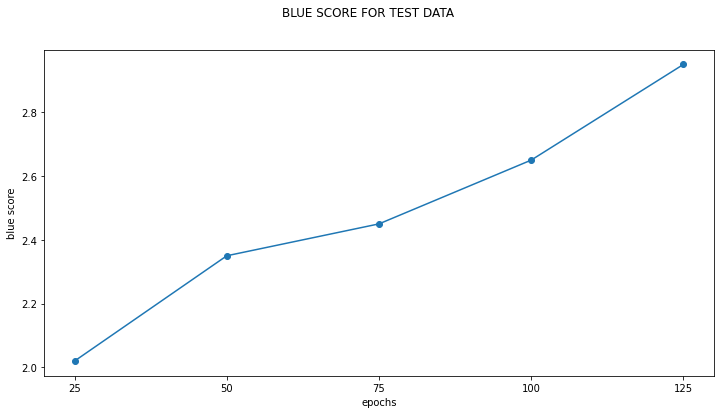

In [ ]:
import matplotlib.pyplot as plt
blue_test = [2.02 , 2.35 , 2.45 , 2.65 , 2.95  ]
plt.figure(figsize = (12 , 6))
plt.plot(range(25,126,25) , blue_test , marker = 'o')
plt.xlabel('epochs')
plt.ylabel('blue score')
plt.xticks(range(25,126,25));
plt.suptitle('BLUE SCORE FOR TEST DATA');

# Valid Eval

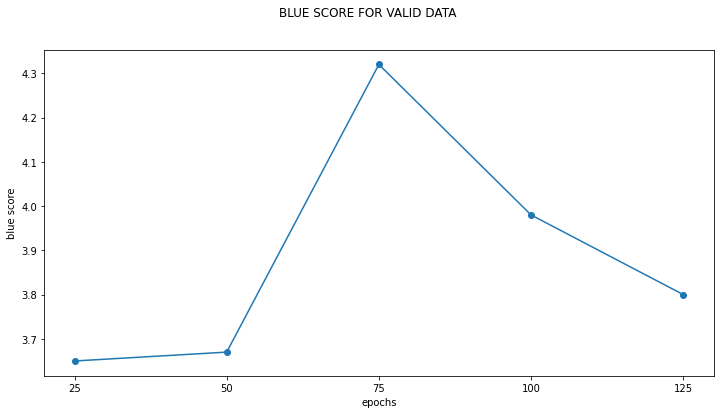

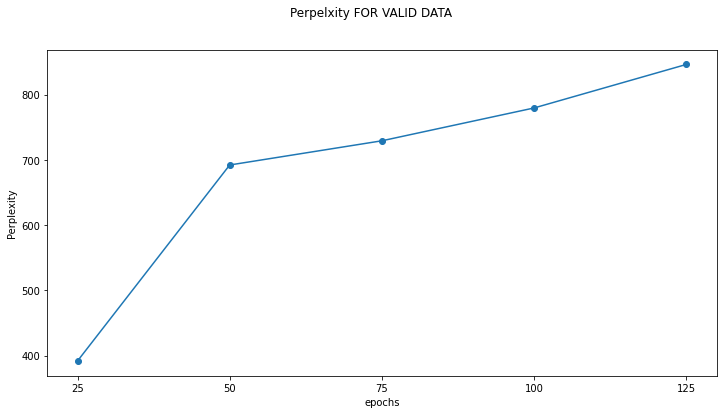

In [ ]:
ppl_valid = [391.8 , 692.26 , 729.37 , 779.7 , 846.39]
blue_valid = [3.65 , 3.67 , 4.32 , 3.98 , 3.8]
plt.figure(figsize = (12 , 6))
plt.plot(range(25,126,25) , blue_valid , marker = 'o')
plt.xlabel('epochs')
plt.ylabel('blue score')
plt.xticks(range(25,126,25));
plt.suptitle('BLUE SCORE FOR VALID DATA');

plt.figure(figsize = (12 , 6))
plt.plot(range(25,126,25) , ppl_valid  , marker = 'o')
plt.xlabel('epochs')
plt.ylabel('Perplexity')
plt.xticks(range(25,126,25));
plt.suptitle('Perpelxity FOR VALID DATA');